<a href="https://colab.research.google.com/github/Harshitt-10/Colab/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R² Score: 0.9990104321003543
RMSE: 2.8849035183403027

Feature Coefficients:
            Feature  Coefficient
0                TV     3.563366
1             Radio    -0.002578
2      Social Media    -0.014578
3   Influencer_Mega     0.014258
4  Influencer_Micro    -0.060055
5   Influencer_Nano    -0.090705


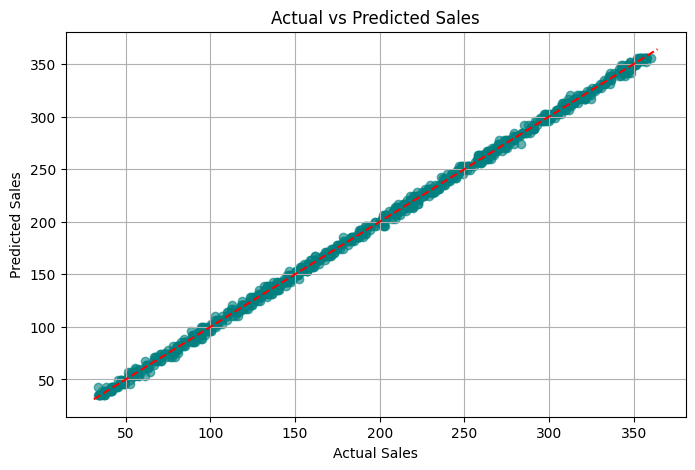

In [1]:
# STEP 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# STEP 2: Load dataset
df = pd.read_csv('Dummy Data HSS.csv')  # Replace with your path if needed

# STEP 3: One-hot encode 'Influencer' and drop NaNs
df_encoded = pd.get_dummies(df, columns=['Influencer'], drop_first=True)
df_encoded = df_encoded.dropna()  # Drop any rows with missing values

# STEP 4: Separate features and target
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 6: Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 7: Make predictions
y_pred = model.predict(X_test)

# STEP 8: Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# STEP 9: Show feature coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coeff_df)

# STEP 10: Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()
